# Ejercicio 4: Modelo Probabilístico
## Objetivo de la práctica
* Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
* Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
* Comparar la recuperación con BM25 frente a TF-IDF.
* Analizar visualmente las diferencias entre los modelos.
* Evaluar si los rankings generados son consistentes con lo que * considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [19]:
#Importar Librerias
import pandas as pd
import numpy as np
import re
import nltk
import math

nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF
Actividad
* Utiliza el corpus cargado.
* Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
* Calcula TF-IDF utilizando sklearn.
* Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [3]:
#Pasar el corpus a dataframe
df = pd.DataFrame(newsgroupsdocs)
df

,0
0,\n\nI am sure some bashers of Pens fans are pr...
1,My brother is in the market for a high-perform...
2,\n\n\n\n\tFinally you said what you dream abou...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,1) I have an old Jasmine drive which I cann...
...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,\nNot in isolated ground recepticles (usually ...
18843,I just installed a DX2-66 CPU in a clone mothe...
18844,\nWouldn't this require a hyper-sphere. In 3-...


In [4]:
#Preprocesar el dataframe
def preprocess_text(text):
    #Convertir a minúsculas
    text = text.lower()
    #Eliminar caracteres no alfabéticos
    text = re.sub(r"[^a-záéíóúñü\s]", " ", text)
    #Tokenización
    tokens = nltk.word_tokenize(text, language="spanish")
    #Stopwords en español
    stop_es = set(stopwords.words("spanish"))
    #Remover tokens muy cortos y stopwords
    tokens = [t for t in tokens if len(t) > 2 and t not in stop_es]

    return tokens


In [5]:
#Aplicar preprocesamiento
df['prep'] = df[0].apply(preprocess_text)
display(df.head())

,0,prep
0,\n\nI am sure some bashers of Pens fans are pr...,"[sure, some, bashers, pens, fans, are, pretty,..."
1,My brother is in the market for a high-perform...,"[brother, the, market, for, high, performance,..."
2,\n\n\n\n\tFinally you said what you dream abou...,"[finally, you, said, what, you, dream, about, ..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,"[think, the, scsi, card, doing, the, dma, tran..."
4,1) I have an old Jasmine drive which I cann...,"[have, old, jasmine, drive, which, can, not, u..."


## Matriz TF

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus_ready = df['prep'].apply(lambda tokens: " ".join(tokens)).tolist()

vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(corpus_ready)

tf_df = pd.DataFrame(
    tf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

display(tf_df.head())


,aaa,aaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaarrrrgh,aaaall,aaack,aaaggghhh,aaah,aaahh,...,zzq,zzrk,zzs,zzum,zzvsi,zzy,zzz,zzzoh,zzzzzz,zzzzzzt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Frecuencia de Documentos DF



In [7]:
# DF = número de documentos con frecuencia > 0 por término
df_vector = np.sum(tf_matrix.toarray() > 0, axis=0)

df_series = pd.Series(df_vector, index=vectorizer.get_feature_names_out())

df_series.head()

,0
aaa,30
aaaaa,2
aaaaaaaaaaaa,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,1
aaaaarrrrgh,1


## Matriz TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_ready)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

display(tfidf_df.head())

,aaa,aaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaarrrrgh,aaaall,aaack,aaaggghhh,aaah,aaahh,...,zzq,zzrk,zzs,zzum,zzvsi,zzy,zzz,zzzoh,zzzzzz,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualizar resultados

In [13]:
n_cols = tfidf_df.shape[1]
block = 200
mid = n_cols // 2

print("DataFrame TF-IDF:")
display(tfidf_df.iloc[:, mid - block : mid + block])

DataFrame TF-IDF:


,lsujpv,lsvh,lsz,ltb,ltbh,ltc,ltcs,ltd,ltdjd,lte,...,lymph,lymphocyte,lymphocytes,lymphoma,lyn,lynch,lynchings,lynda,lyndon,lynette
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF
Actividad
* Dada una consulta, construye el vector de consulta
* Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
* Genera un ranking de los documentos ordenados por relevancia.
* Muestra los resultados en una tabla.

## Vector de consulta

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_ready = df['prep'].apply(lambda tokens: " ".join(tokens)).tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_ready)

In [16]:
query = 'government'
q_proc = preprocess_text(query)
q_vec = vectorizer.transform([query])

## Similitud Coseno

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

df['q_sim'] = cosine_similarity(X, q_vec)
df.sort_values(by='q_sim', ascending=False)

,0,prep,q_sim
8841,"\nSaw it in t.p.m., thanks.\n\n\n\n\nYes, and ...","[saw, thanks, yes, and, the, individual, not, ...",0.401602
5905,\tYou have underlined here the battle that mus...,"[you, have, underlined, here, the, battle, tha...",0.394722
15813,>government maintaining a secret of some kind.,"[government, maintaining, secret, some, kind]",0.378242
5225,\n\nI suspect the government feels it is enoug...,"[suspect, the, government, feels, enough, prev...",0.356745
13956,\nDoesn't this just mean that the government m...,"[doesn, this, just, mean, that, the, governmen...",0.339222
...,...,...,...
6435,\n\n\nI suspect you mean laparoscopic instead ...,"[suspect, you, mean, laparoscopic, instead, or...",0.000000
6434,\nI strongly disagree that absolute truth woul...,"[strongly, disagree, that, absolute, truth, wo...",0.000000
6433,Re: Methods for attaching heat sink to process...,"[methods, for, attaching, heat, sink, processo...",0.000000
6431,That was the entire point to *you*. What ex...,"[that, was, the, entire, point, you, what, exa...",0.000000


In [18]:
# Ranking de similitudes
ranking = df.sort_values(by='q_sim', ascending=False)
display(ranking[['q_sim']].head(20))

,q_sim
8841,0.401602
5905,0.394722
15813,0.378242
5225,0.356745
13956,0.339222
8537,0.338879
1817,0.329424
395,0.328145
7270,0.326009
16946,0.320979


## Parte 3: Ranking con BM25
Actividad
* Implementa un sistema de recuperación usando el modelo BM25.
* Usa la misma consulta del ejercicio anterior.
* Calcula el score BM25 para cada documento y genera un ranking.
* Compara manualmente con el ranking de TF-IDF.

Algoritmo BM25:
* Tokenización
* Calcular longitudes de documentos y promedio de longitud
* Calcular TF (frecuencia de término por documento)
* Calcular DF (document frequency) e IDF de BM25
* Definir los parámetros de BM25 (k1, b)
* Implementar la función de score BM25 para un documento
* Función para calcular la probabilidad para todos los documentos de la colección a partir de una query
* Recuperar los documentos mejor puntuados (ranking)

In [20]:
#Algoritmo BM25
corpus = df['prep'].tolist()

class BM25:
    def __init__(self, corpus, k1=1.5, b=0.75):
        self.corpus = corpus
        self.N = len(corpus)
        self.k1 = k1
        self.b = b

        self.doc_len = np.array([len(doc) for doc in corpus])
        self.avgdl = np.mean(self.doc_len)

        self.term_freqs = [Counter(doc) for doc in corpus]

        #DF
        df_counter = Counter()
        for doc in corpus:
            df_counter.update(set(doc))

        self.df = df_counter

        #Vocabulario
        self.vocab = list(df_counter.keys())

        #IDF
        self.idf = {
            term: math.log( (self.N - df + 0.5) / (df + 0.5) + 1 )
            for term, df in df_counter.items()
        }

    #Score BM25 para una consulta
    def get_scores(self, query_tokens):
        scores = np.zeros(self.N)

        for term in query_tokens:
            if term not in self.df:
                continue

            idf = self.idf[term]

            for i, tf in enumerate([doc.get(term, 0) for doc in self.term_freqs]):
                if tf == 0:
                    continue

                dl = self.doc_len[i]
                denom = tf + self.k1 * (1 - self.b + self.b * dl / self.avgdl)
                score = idf * (tf * (self.k1 + 1)) / denom
                scores[i] += score

        return scores



In [21]:
#Crear objeto BM25 del corpus
bm25 = BM25(corpus)

In [22]:
#Busqueda con BM25
def bm25_search(query, top_k=5):
    if isinstance(query, str):
        query = query.lower().split()

    scores = bm25.get_scores(query)

    top_idx = np.argsort(scores)[::-1][:top_k]

    resultados = []
    for idx in top_idx:
        resultados.append({
            "doc_id": idx,
            "score": scores[idx],
            "texto": " ".join(df['prep'].iloc[idx])[:250] + "..."
        })

    return resultados


In [25]:
#Consulta la misma query
resultados = bm25_search(query, top_k=5)

for r in resultados:
    print(f"Doc {r['doc_id']} | Score: {r['score']:.4f}")
    print(r["texto"])
    print("-" * 80)

Doc 5905 | Score: 6.2470
you have underlined here the battle that must fought battle for the hearts and minds the american public people must realize that the government not their fit father confessor the government does not have right share our every thought the moment deci...
--------------------------------------------------------------------------------
Doc 5225 | Score: 6.1667
suspect the government feels enough prevent companies from offering secure encryption services big companies don take that kind risk they too visible and have too much lose the government may not have make encryption illegal prevent its use they coul...
--------------------------------------------------------------------------------
Doc 395 | Score: 6.0784
either the government force available doesn the libertarian position that the government can use force only when someone else uses force first even when that first force not directed against the government but one its citizens that all being true wha...
--

## Parte 4: Comparación visual entre TF-IDF y BM25
Actividad
* Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
* Compara los rankings visualmente.
* Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
* Sugiere: ¿A qué se podría deber esta diferencia?

## Comparacion de rankings TF-IDF y BM25

In [28]:
corpus_bm25 = df['prep'].tolist()

In [29]:
!pip install rank_bm25

In [30]:
from rank_bm25 import BM25Okapi

# Construir el modelo BM25
bm25 = BM25Okapi(corpus_bm25)

# Preprocesar la query correctamente (lista de tokens)
query_tokens = query.split()     # <-- modifica esto si tu query necesita tu propio preprocesamiento


In [31]:
scores = bm25.get_scores(query_tokens)


In [32]:
import numpy as np

df['bm25_score'] = np.array(scores)


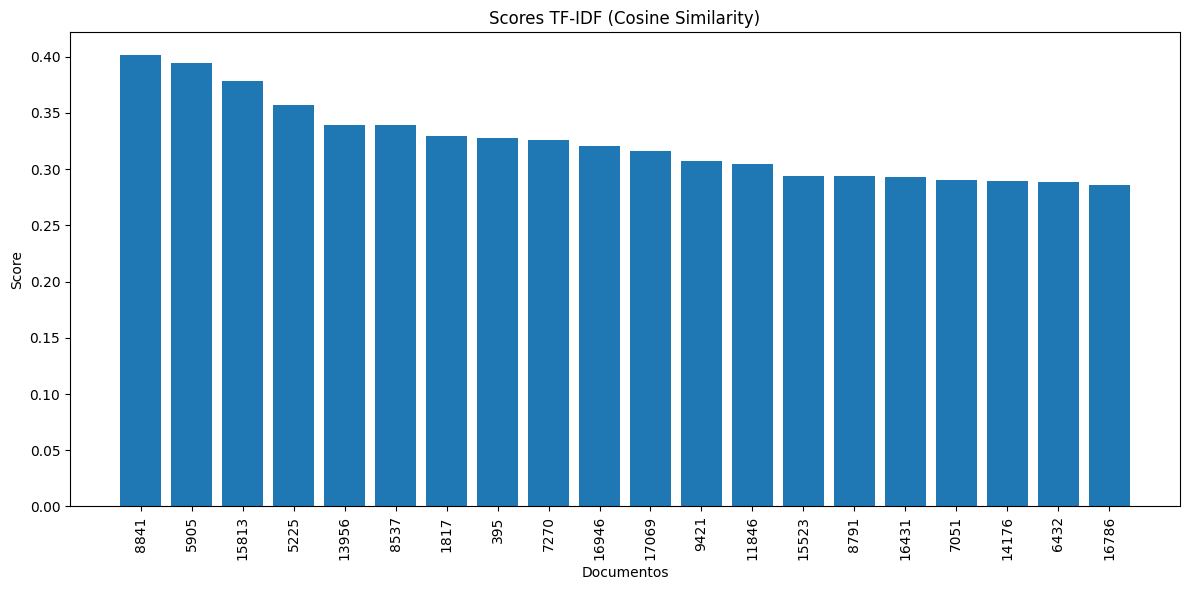

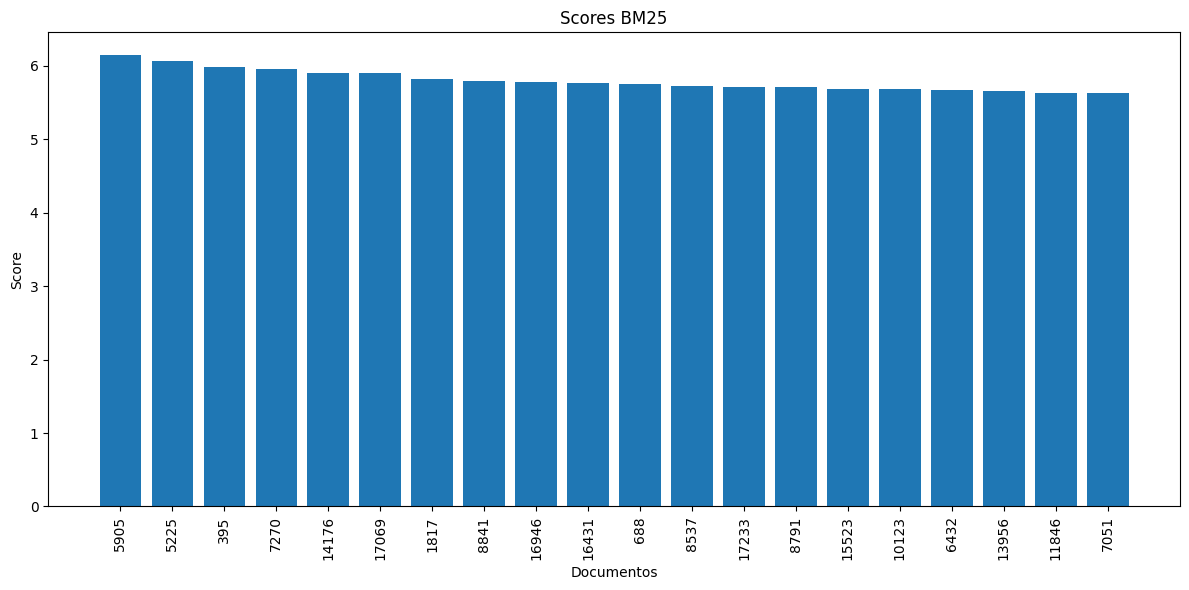

In [33]:
import matplotlib.pyplot as plt

#20 documentos más relevantes para graficar
top_n = 20
df_plot = df.sort_values('q_sim', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(range(top_n), df_plot['q_sim'])
plt.xticks(range(top_n), df_plot.index, rotation=90)
plt.title("Scores TF-IDF (Cosine Similarity)")
plt.xlabel("Documentos")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# Gráfico BM25
df_plot = df.sort_values('bm25_score', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(range(top_n), df_plot['bm25_score'])
plt.xticks(range(top_n), df_plot.index, rotation=90)
plt.title("Scores BM25")
plt.xlabel("Documentos")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?

En TF-IDF los textos largos tendran mas score donde la query aparece muchas veces que BM25

En BM25 los textos cortos donde los términos de la query aparecen una o dos veces tendran mas score que TF-IDF.

## Sugiere: ¿A qué se podría deber esta diferencia?

BM25 penaliza fuertemente los documentos muy largos y  TF-IDF no penaliza la longitud del documento

## Parte 5: Evaluación con consulta relevante
Actividad
* Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
* Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
* Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [35]:
#Columna de relevancia
df['relevante'] = df['prep'].apply(lambda tokens: 1 if query.lower() in tokens else 0)
df['relevante'].value_counts()


,count
relevante,
0,17949
1,897


## Precision@3

In [37]:
def precision_at_k(df, score_col, k=3):
    ranking = df.sort_values(score_col, ascending=False).head(k)
    return ranking['relevante'].sum() / k

p3_tfidf = precision_at_k(df, 'q_sim', k=3)
p3_bm25 = precision_at_k(df, 'bm25_score', k=3)

print("Precision@3 TF-IDF:", p3_tfidf)
print("Precision@3 BM25:", p3_bm25)


Precision@3 TF-IDF: 1.0
Precision@3 BM25: 1.0


## Average Precision (AP)

In [38]:
def average_precision(df, score_col):
    df_sorted = df.sort_values(score_col, ascending=False)

    precisions = []
    relevant_count = 0

    for i, (_, row) in enumerate(df_sorted.iterrows(), 1):
        if row['relevante'] == 1:
            relevant_count += 1
            precisions.append(relevant_count / i)

    if relevant_count == 0:
        return 0

    return sum(precisions) / relevant_count


## MAP para TF-IDF y BM25

In [40]:
map_tfidf = average_precision(df, 'q_sim')
map_bm25 = average_precision(df, 'bm25_score')

print("MAP TF-IDF:", map_tfidf)
print("MAP BM25:", map_bm25)


MAP TF-IDF: 1.0
MAP BM25: 1.0


## ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?
BM25 es mejor que TF-IDF porque da más peso a la coincidencia directa del término